In [1]:
import cv2
import numpy as np

In [2]:
def is_jupyter():
    try:
        import IPython

        if IPython.get_ipython() is not None:
            # print("Running in Jupyter Notebook")
            return True
        else:
            return False
            # print("Running as a standalone .py file")
    except NameError:
        return False

In [3]:
def display(text, image):
    
    if is_jupyter():
        print("Running in Jupyter Notebook")
        import matplotlib.pyplot as plt
        import matplotlib as mpl
        mpl.rcParams['figure.dpi'] = 300

        plt.title(text)
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    else:
        print("Running as a standalone .py file")
        cv2.imshow(text, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [4]:
def fetch_fonts():

    import cv2
    import inspect
    
    # # Get a list of all attributes in the cv2 module
    # cv2_attributes = [name for name, _ in inspect.getmembers(cv2)]

    # # Filter and print the attributes that start with 'FONT'
    # font_attributes = [attr for attr in cv2_attributes if attr.startswith('FONT')]
    
    # font_dict = dict()
    # for font_attr in font_attributes:
    #     font_value = getattr(cv2, font_attr)
    #     # print(f"{font_attr}: {font_value}")
    #     font_dict[font_attr] = font_value
    # print(font_dict)

    # all above in single line
    return dict(sorted({key:val for key, val in inspect.getmembers(cv2) \
        if isinstance(val, int) and key.startswith('FONT_')}.items(), key=lambda x:x[1]))

In [5]:
def display_cv_fonts():

    # Get all available font types
    font_types = fetch_fonts()

    # Create a blank image with a black background
    blank_image = np.zeros((500, 1200, 3), np.uint8)

    text_to_show = "The quick brown fox jumps over the lazy dog"

    font_scale = 1
    color = (255, 255, 255)
    y_position = 40

    # Put text using each font type and display the result
    for font_name, value in font_types.items():
        cv2.putText(blank_image,
                    (" ".join(font_name.split("_")[1:]).lower().title()) + " : " + text_to_show,
                    (20, y_position),
                    # fontFace=getattr(cv2, font_name),
                    fontFace=value,
                    fontScale=font_scale,
                    color=color)
        y_position += 40

    display(text='Fonts', image=blank_image)


Running in Jupyter Notebook


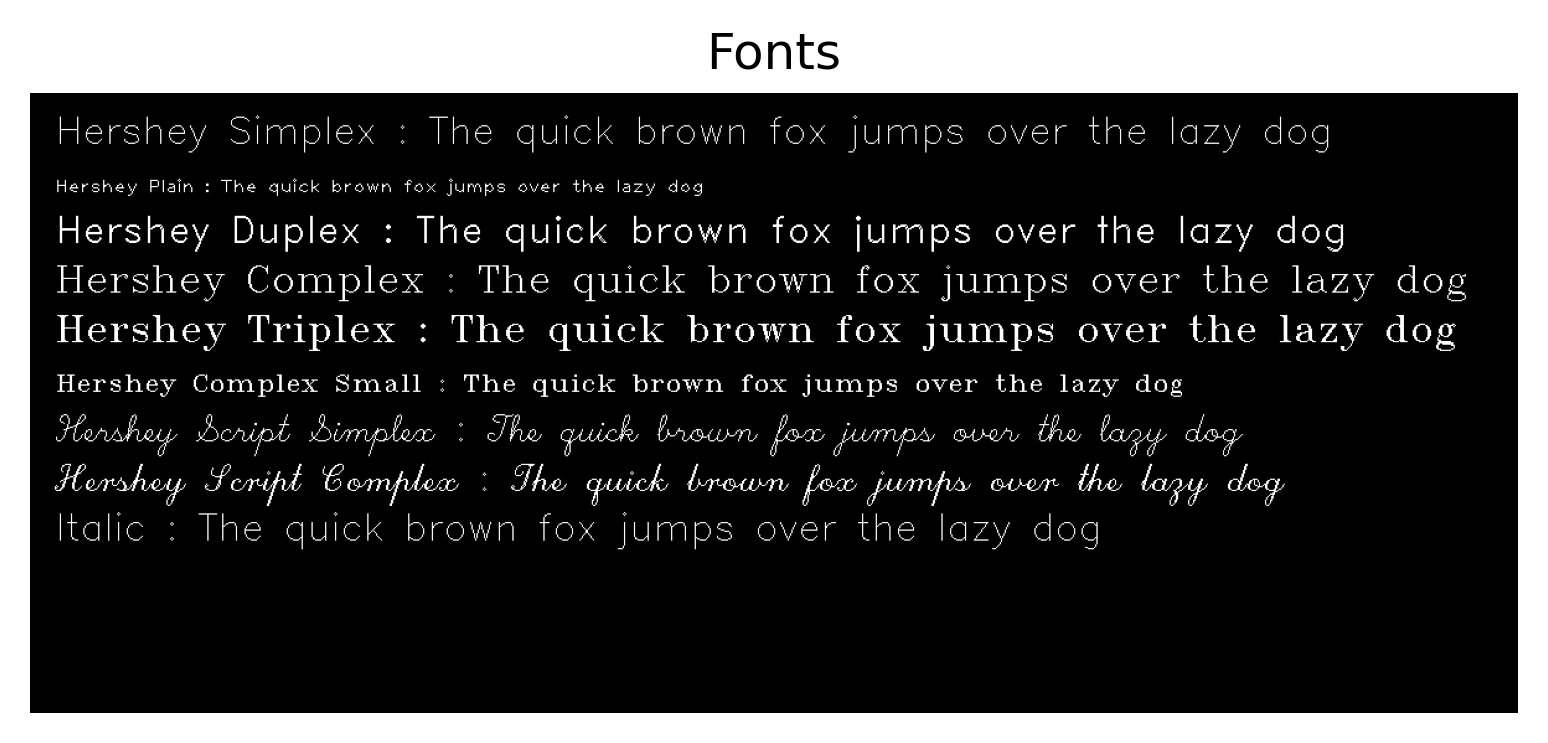

In [6]:
if __name__ == "__main__":
    display_cv_fonts()